In [14]:
# read data
import csv

def load_data():
    data = []

    label = ['image_id','unixtime','rawtime','title','total_votes','reddit_id','number_of_upvotes',\
    'subreddit','number_of_downvotes','localtime','score','number_of_comments','username',\
    'undefined1','undefined2', 'undefined3']

    with open('data/redditSubmissions.csv') as csvfile:
        csvReader = csv.reader(csvfile)
        for row in csvReader:
            if row[0] == '#image_id' or len(row) < 13:
                continue

            d = {}
            for i,elem in enumerate(row):
                d[label[i]] = elem
            data.append(d)


    return data


data = load_data()


Since there are 132307 valid data entries, there are 132307 submissions.

In [15]:
from collections import Counter
users = Counter()
images = Counter()
subreddits = Counter()
for d in data:
    images[d['image_id']] += 1
    users[d['reddit_id']] += 1
    subreddits[d['subreddit']] += 1

print len(images)
print len(users)

16736
132214


There are 16736 distinct images, and 132214 distinct users(identified by "reddit_id").

In [16]:
# Score of sucess versus time
# Notice that the T in rawtime does not mean Tuesday, but means Time

import re
catchTime = re.compile("(.*)T(\d{2}):(\d{2}).*((-|\+)\d{2})")


for d in data:
    t = d['rawtime']
    m = catchTime.search(t)
    if m:
        d['hour'] = int(m.group(2))
        d['minute'] = int(m.group(3))
        if d['minute'] >= 30:
            d['time'] = (d['hour'] +1)%24
        else:
            d['time'] = d['hour']
                
        
        d['timezone'] = int(m.group(4))
        #d['date'] = m.group(1) # might be 1 hour off
        d['UTCtime'] = (d['time'] + d['timezone'])%24
    else:
        #Acutally this never happens
        d['time'] = 0
#     score = int(d['number_of_upvotes'])-int(d['number_of_downvotes'])
#     d['success'] = score

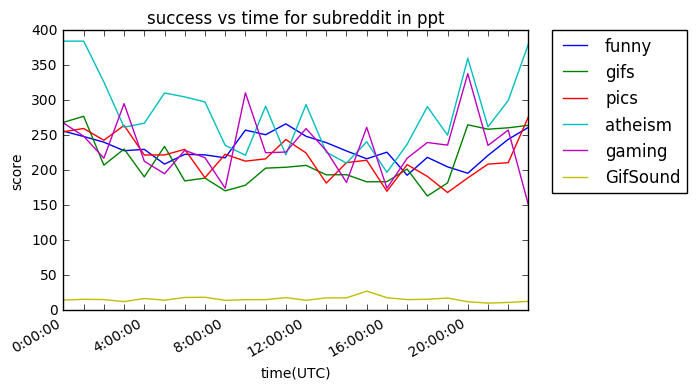

In [17]:
from pylab import *
import matplotlib.pyplot as plt
import datetime

egsub = ['atheism','funny','gaming','gifs','pics','GifSound']
subs = {}
subsCount = {}
for sub in egsub:
    subs[sub] = 0
    subsCount[sub] = 0
# subs

for s in subs:
    #print "plotting", s, "..."
    l = [0.0]*24
    c = [0.0]*24
    xt = [str(datetime.timedelta(hours = i)) for i in range(24)]
    x = [i for i in range(24)]
    sxt = [xt[i] if i%4 ==0 else '' for i in range(24)]
    
    #print x
    for d in data:
        if d['subreddit'] == s:
            l[d['UTCtime']] += int(d['score'])
            c[d['UTCtime']] += 1
#     print s,c
    for i in range(len(l)):
        l[i] /= c[i]
        #print l[i]
    
    plt.plot(x,l,label = s)
    plt.xticks(arange(24), sxt)
    plt.gcf().autofmt_xdate()
    xlabel('time(UTC)')
    ylabel('score')
    title('success vs time for subreddit in ppt')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

            

//anaconda/lib/python2.7/site-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


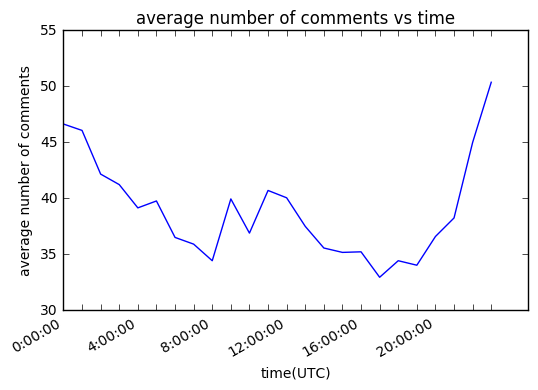

In [18]:
# What times of day are submissions most commented or rated?
cmts = [0.0]*24
cnts = [0.0]*24

for d in data:
    cmts[d['UTCtime']] += int(d['number_of_comments'])
    cnts[d['UTCtime']] += 1
    
for i in range(len(cmts)):
        cmts[i] /= cnts[i]
    
    
xt = [str(datetime.timedelta(hours = i)) for i in range(24)]
x = [i for i in range(24)]
sxt = [xt[i] if i%4 ==0 else '' for i in range(24)]


plt.plot(x,cmts)
plt.xticks(arange(24), sxt)
plt.gcf().autofmt_xdate()
xlabel('time(UTC)')
ylabel('average number of comments')
title('average number of comments vs time')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

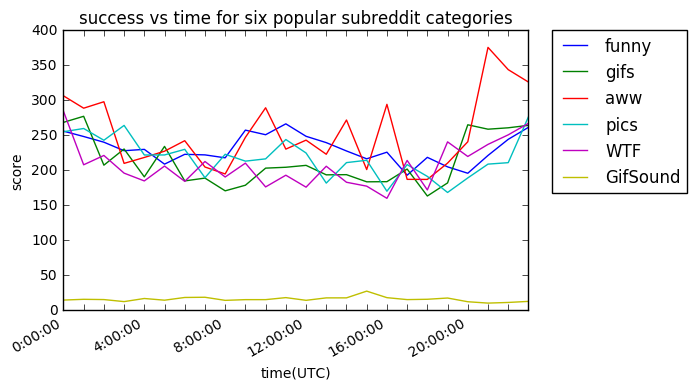

In [21]:
from pylab import *
import matplotlib.pyplot as plt
import datetime

subs = {}
subsCount = {}
for sub in subreddits.most_common(6):
    subs[sub[0]] = 0
    subsCount[sub[0]] = 0
# subs

for s in subs:
    #print "plotting", s, "..."
    l = [0.0]*24
    c = [0.0]*24
    xt = [str(datetime.timedelta(hours = i)) for i in range(24)]
    x = [i for i in range(24)]
    sxt = [xt[i] if i%4 ==0 else '' for i in range(24)]
    
    #print x
    for d in data:
        if d['subreddit'] == s:
            l[d['UTCtime']] += int(d['score'])
            c[d['UTCtime']] += 1
    for i in range(len(l)):
        l[i] /= c[i]
        #print l[i]
    
    plt.plot(x,l,label = s)
    plt.xticks(arange(24), sxt)
    plt.gcf().autofmt_xdate()
    xlabel('time(UTC)')
    ylabel('score')
    title('success vs time for six popular subreddit categories')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()


In [20]:
# A peek of data
data[0]

{'UTCtime': 6,
 'hour': 12,
 'image_id': '0',
 'localtime': '1333197639',
 'minute': 40,
 'number_of_comments': '622',
 'number_of_downvotes': '30813',
 'number_of_upvotes': '32657',
 'rawtime': '2012-03-31T12:40:39.590113-07:00',
 'reddit_id': 'rmqjs',
 'score': '1844',
 'subreddit': 'funny',
 'time': 13,
 'timezone': -7,
 'title': "And here's a downvote.",
 'total_votes': '63470',
 'unixtime': '1333172439',
 'username': 'Animates_Everything'}